##Description

Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp,ttest_ind,mannwhitneyu,wilcoxon,levene,shapiro
from statsmodels.stats.power import ttest_power

In [2]:
%matplotlib inline
sns.set(color_codes=True)

In [3]:
golfball = pd.read_excel("SM4-Golf.xls")
dfball = pd.DataFrame(golfball)

In [4]:
dfball.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [5]:
dfball.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [6]:
dfball.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


#Checking the outliers

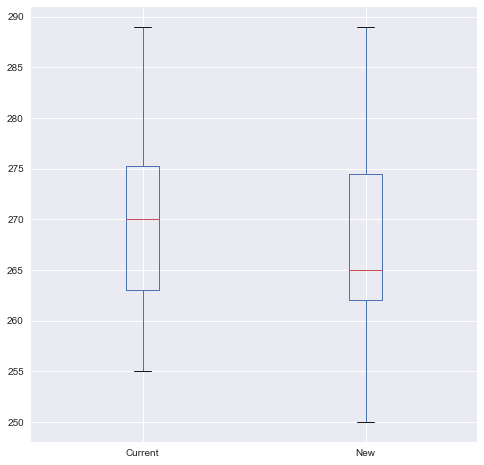

In [7]:
dfball.boxplot(figsize=(8,8))

 From the box plot, there are no outliers in the given data set.
 
 1. Current Golf ball, more data's where present below the Median.
 2. New Golf ball, more data's where present above the Median. 

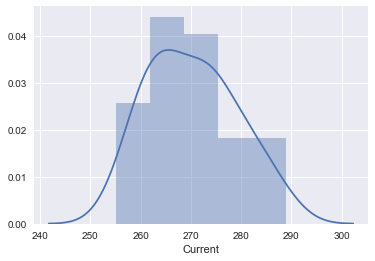

In [8]:
sns.distplot(dfball['Current'],kde=True)

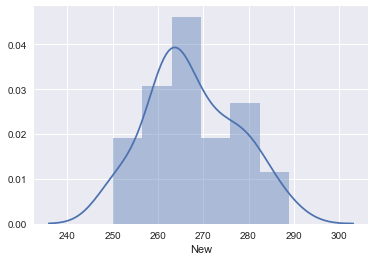

In [9]:
sns.distplot(dfball['New'],kde=True)

##Null Hypothesis , Alternative Hypothesis
Ho: NewBall = CurrBall 
Ha: NewBall > CurrBall 

T-Test 
1 .The variance of the two samples are different.

In [10]:
curr_tstat,curr_pvalue=ttest_ind(dfball['Current'],dfball['New'])
print('T-Statistics %.4f P-Value %.4f'%(curr_tstat,curr_pvalue))

T-Statistics 1.3284 P-Value 0.1879


p-value is greater than the alpha value 0.05, hence do not reject Ho

U-Test (Mannwhitneyu)

In [11]:
u,pvalue=mannwhitneyu(dfball['Current'],dfball['New'])
print(u,pvalue)

668.0 0.102651921229


p-value is greater than the alpha value 0.05, hence do not reject Ho

##Levene Test

In [12]:
levene(dfball['Current'],dfball['New'])

LeveneResult(statistic=0.25532382917657409, pvalue=0.61477595233313087)

In Levene Test the pvalue is greater than the significance level, hence do not reject Ho.

##Shapiro Test

In [13]:
shapiro(dfball['Current'])

(0.9707046747207642, 0.378787100315094)

In [14]:
shapiro(dfball['New'])

(0.9678263664245605, 0.3064655363559723)

Both current and new ball pvalue is greater than the alpha value , hence do not reject Ho.

##Pooled Standard Deviation

In [15]:
poStd = (np.mean(dfball['Current'])-np.mean(dfball['New']))/np.sqrt(((40-1) * np.var(dfball['Current']) + (40-1) * np.var(dfball['New']))/40+40 - 2)

In [16]:
print('Poolled Standard Deviation Value %.5f'%(poStd))

Poolled Standard Deviation Value 0.19432


In [17]:
cMu = np.mean(dfball['Current'])
nMu = np.mean(dfball['New'])
cVar = np.var(dfball['Current'])
nVar = np.var(dfball['New'])
stdPooled = np.sqrt(((40-1)*cVar + (40-1)*nVar) / (80-2))
SD = (cMu-nMu) / stdPooled
print('stdPooled  :%f SD :%f' %(stdPooled,SD))
print('cMu %.4f:nMu %.4f:cVar %.4f:nVar %.4f'% (cMu,nMu,cVar,nVar))
print('Power of Test Value %.4f'%(ttest_power(SD,nobs=40,alpha=0.05,alternative="two-sided")))

stdPooled  :9.224949 SD :0.300815
cMu 270.2750:nMu 267.5000:cVar 74.6994:nVar 95.5000
Power of Test Value 0.4585


##Power of Test

In [20]:
pofTest = ttest_power(SD,nobs=40,alpha=0.05,alternative="two-sided")
print('Power of Test Value %.4f'%pofTest)

Power of Test Value 0.4585


The Power of Test is 45%.

##Conclusion

With the given data set at 95% of Confidence Interval Mean, do not reject Ho. 
Hence the introduction of a cut-resistant,longer-lasting golf new ball does not increase the market share.